In [1]:
from xspec import *
import matplotlib as plt
import os.path
from os import path
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter  # For formatting axis label

In [2]:
AllModels.clear()
AllData.clear()

In [13]:
data1 = Spectrum('/home/egulbaha/my_workspace/xmm_sas_datalabs/data/VelaJupyter04Dec/PN_spectrum_grp_32-36_40-44.fits') 
data2= Spectrum('/home/egulbaha/my_workspace/xmm_sas_datalabs/data/camillespectra/nondefault/PN_spectrum_grp_32-36_40-44.fits')
data3= Spectrum('/home/egulbaha/my_workspace/xmm_sas_datalabs/data/VelaTerminal03Dec/PN_spectrum_grp_32-36_40-44.fits')

AllData.show()


1 spectrum  in use
 
Spectral Data File: /home/egulbaha/my_workspace/xmm_sas_datalabs/data/VelaJupyter04Dec/PN_spectrum_grp_32-36_40-44.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.908e+01 +/- 2.119e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-238
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.093e+05 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/egulbaha/my_workspace/xmm_sas_datalabs/data/VelaJupyter04Dec/PN_32-36_40-44.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/egulbaha/my_workspace/xmm_sas_datalabs/data/VelaJupyter04Dec/PN_32-36_40-44.arf


2 spectra  in use
 
Spectral Data File: /home/egulbaha/my_workspace/xmm_sas_datalabs/data/camillespectra/nondefault/PN_spectrum_grp_32-36_40-44.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  4.907e+01 +/- 2.119e-02
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-238
  Telescope: XMM Instrument: EPN  Channel Type: 

In [14]:
Plot.device = "/null"

In [15]:
# First inspection of the spectrum

Plot.xAxis = "keV"        # set X axis to energy units
Plot.xLog  = True         # log scale
Plot.yLog  = True         # log scale
Plot("data")   # plot source and background spectra

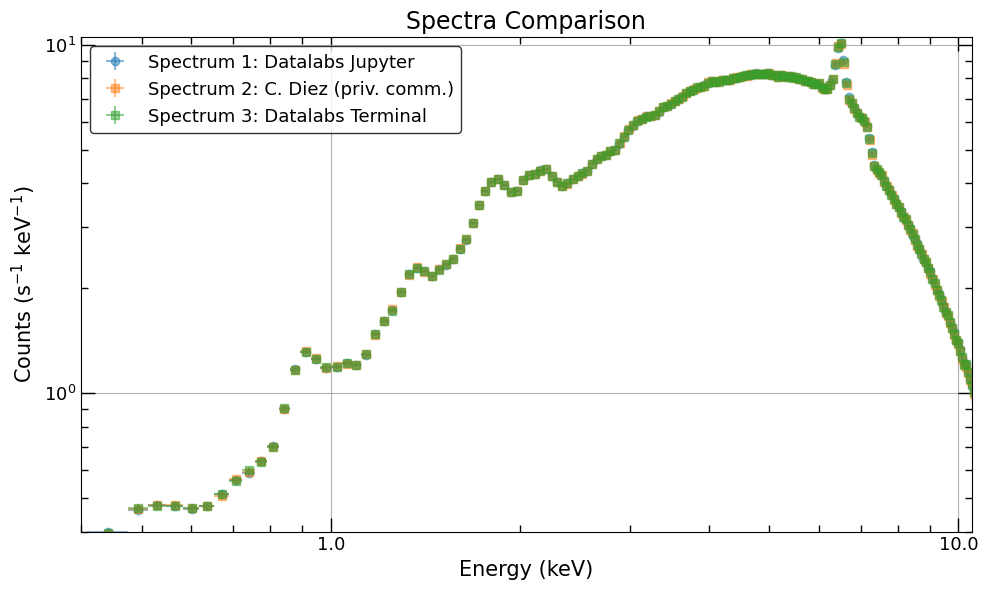

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract data for the first spectrum
x1 = Plot.x(1)          # X-axis values for first spectrum
y1 = Plot.y(1)          # Y-axis values for first spectrum
xerr1 = Plot.xErr(1)
yerr1 = Plot.yErr(1)    # Y-axis error values for first spectrum

# Extract data for the second spectrum
x2 = Plot.x(2)          # X-axis values for second spectrum
y2 = Plot.y(2)          # Y-axis values for second spectrum
xerr2 = Plot.xErr(2)
yerr2 = Plot.yErr(2)    # Y-axis error values for second spectrum

x3 = Plot.x(3)          # X-axis values for first spectrum
y3 = Plot.y(3)          # Y-axis values for first spectrum
xerr3 = Plot.xErr(3)
yerr3 = Plot.yErr(3)

# Plot both spectra with error bars
ax.errorbar(x1, y1, xerr=xerr1, yerr=yerr1, marker='o', linestyle='none', label='Spectrum 1: Datalabs Jupyter', alpha=0.5)
ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, marker='s', linestyle='none', label='Spectrum 2: C. Diez (priv. comm.)', alpha=0.5)
ax.errorbar(x3, y3, xerr=xerr3, yerr=yerr3, marker='s', linestyle='none', label='Spectrum 3: Datalabs Terminal', alpha=0.5)

plt.xlim(0.4, 10.5)
plt.ylim(0.4, 10.5)
#ax.set_xlim(6, 7)
#ax.set_ylim(6, 11)

# Customize the plot appearance
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison", fontsize=17)
ax.legend(fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)

# Display the plot
plt.tight_layout()
plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_comparison_big_04Dec.png", dpi=300)
plt.show()

Mean Deviation: 0.0150
Weighted Mean Deviation: 0.0070


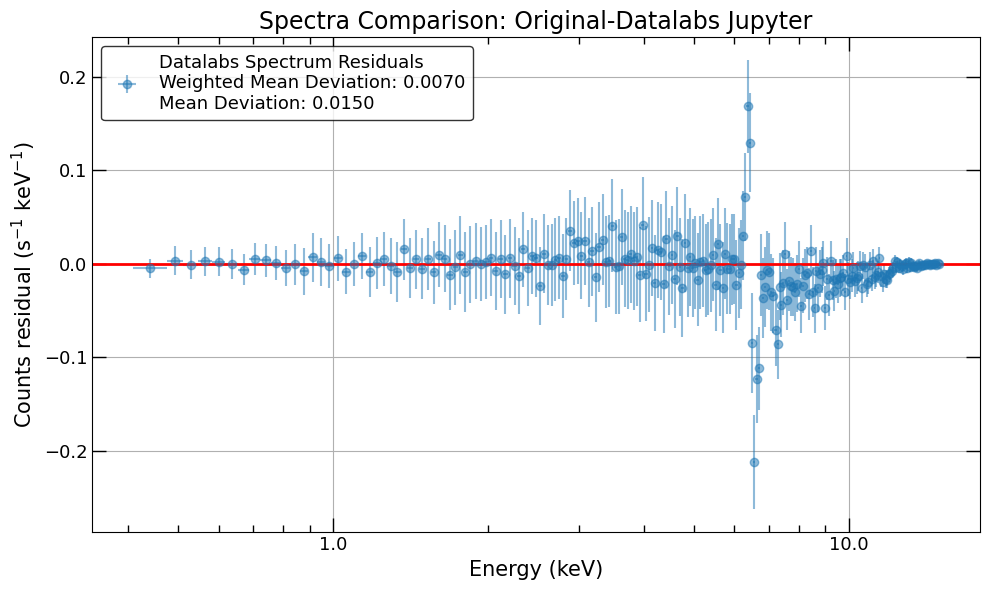

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract data for the first spectrum
x1 = Plot.x(1)          # X-axis values for first spectrum
y1 = Plot.y(1)          # Y-axis values for first spectrum
xerr1 = Plot.xErr(1)
yerr1 = Plot.yErr(1)    # Y-axis error values for first spectrum

# Extract data for the second spectrum
x2 = Plot.x(2)          # X-axis values for second spectrum
y2 = Plot.y(2)          # Y-axis values for second spectrum
xerr2 = Plot.xErr(2)
yerr2 = Plot.yErr(2)    # Y-axis error values for second spectrum

counts_residual=[]
residual_err = []
for i in range(len(y2)): 
    counts_residual.append(y2[i] - y1[i])
    residual_err.append((yerr1[i]**2 + yerr2[i]**2)**0.5 )
    
#print(counts_residual)
mean_deviation = np.mean(np.abs(counts_residual))

# Print the result
print(f"Mean Deviation: {mean_deviation:.4f}")

# wieghted mean to account for varying uncertainties in the data
weighted_mean_deviation = np.sum(np.abs(counts_residual) / np.array(residual_err)) / np.sum(1 / np.array(residual_err))

# Print the weighted mean deviation
print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot both spectra with error bars
ax.errorbar(x1, counts_residual, xerr=xerr1, yerr=residual_err, marker='o', linestyle='none', label=f'Datalabs Spectrum Residuals\nWeighted Mean Deviation: {weighted_mean_deviation:.4f}\nMean Deviation: {mean_deviation:.4f}', alpha=0.5)
#ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, marker='s', linestyle='none', label='Spectrum 2: C. Diez (priv. comm.)', alpha=0.5)

#plt.xlim(0.4, 10.5)
#plt.ylim(0.4, 10.5)


# Customize the plot appearance
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts residual (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison: Original-Datalabs Jupyter", fontsize=17)
ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
ax.axhline(0, color='red', linewidth=2, linestyle='-', label='y=0 Line')

# Display the plot
plt.tight_layout()
plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_comparison_yresiduals_jupyter4Dec.png", dpi=300)
plt.show()



238
238
238
238
Mean Deviation: 0.0105
Weighted Mean Deviation: 0.0046


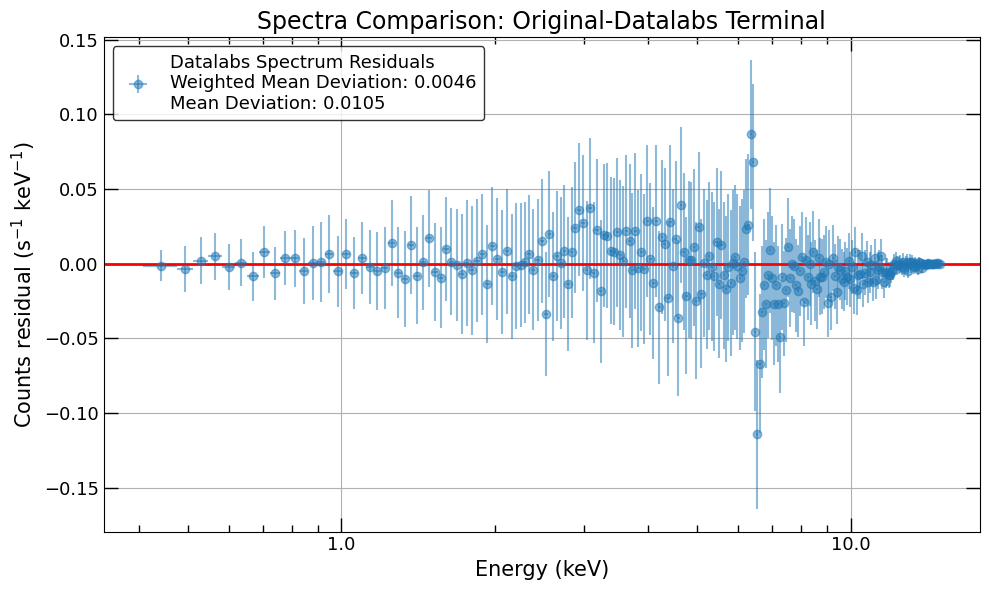

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract data for the first spectrum
x3 = Plot.x(3)          # X-axis values for first spectrum
y3 = Plot.y(3)          # Y-axis values for first spectrum
xerr3 = Plot.xErr(3)
yerr3 = Plot.yErr(3)    # Y-axis error values for first spectrum

# Extract data for the second spectrum
x2 = Plot.x(2)          # X-axis values for second spectrum
y2 = Plot.y(2)          # Y-axis values for second spectrum
xerr2 = Plot.xErr(2)
yerr2 = Plot.yErr(2)    # Y-axis error values for second spectrum

print(len(y3))
print(len(x3))
print(len(y2))
print(len(x2))
counts_residual = []
residual_err = []
min_length = min(len(y3), len(y2))

for i in range(min_length): 
    counts_residual.append(y2[i] - y3[i])
    residual_err.append((yerr3[i]**2 + yerr2[i]**2)**0.5)


x3 = x3[:min_length]
xerr3 = xerr3[:min_length]
mean_deviation = np.mean(np.abs(counts_residual))

# Print the result
print(f"Mean Deviation: {mean_deviation:.4f}")

# wieghted mean to account for varying uncertainties in the data
weighted_mean_deviation = np.sum(np.abs(counts_residual) / np.array(residual_err)) / np.sum(1 / np.array(residual_err))

# Print the weighted mean deviation
print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot both spectra with error bars
ax.errorbar(x3, counts_residual, xerr=xerr3, yerr=residual_err,
            marker='o', linestyle='none',
            label=f'Datalabs Spectrum Residuals\nWeighted Mean Deviation: {weighted_mean_deviation:.4f}\nMean Deviation: {mean_deviation:.4f}',
            alpha=0.5)
#plt.xlim(0.4, 10.5)
#plt.ylim(0.4, 10.5)


# Customize the plot appearance
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts residual (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison: Original-Datalabs Terminal", fontsize=17)
ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
ax.axhline(0, color='red', linewidth=2, linestyle='-', label='y=0 Line')

# Display the plot
plt.tight_layout()
plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_comparison_yresiduals_terminal4Dec.png", dpi=300)
plt.show()



Mean Deviation: 0.0088
Weighted Mean Deviation: 0.0041


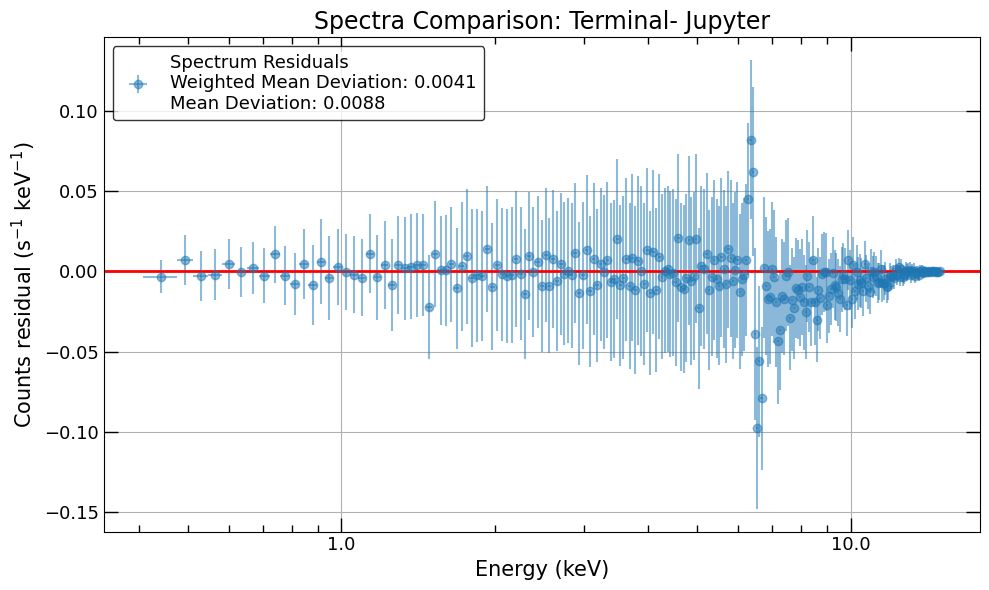

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract data for the first spectrum jupyter
x1 = Plot.x(1)          # X-axis values for first spectrum
y1 = Plot.y(1)          # Y-axis values for first spectrum
xerr1 = Plot.xErr(1)
yerr1 = Plot.yErr(1)    # Y-axis error values for first spectrum

# Extract data for the third spectrum terminal
x3 = Plot.x(3)          # X-axis values for second spectrum
y3 = Plot.y(3)          # Y-axis values for second spectrum
xerr3 = Plot.xErr(3)
yerr3 = Plot.yErr(3)    # Y-axis error values for second spectrum

counts_residual=[]
residual_err = []
for i in range(len(y2)): 
    counts_residual.append(y3[i] - y1[i])
    residual_err.append((yerr1[i]**2 + yerr3[i]**2)**0.5 )
    
#print(counts_residual)
mean_deviation = np.mean(np.abs(counts_residual))

# Print the result
print(f"Mean Deviation: {mean_deviation:.4f}")

# wieghted mean to account for varying uncertainties in the data
weighted_mean_deviation = np.sum(np.abs(counts_residual) / np.array(residual_err)) / np.sum(1 / np.array(residual_err))

# Print the weighted mean deviation
print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot both spectra with error bars
ax.errorbar(x1, counts_residual, xerr=xerr1, yerr=residual_err, marker='o', linestyle='none', label=f'Spectrum Residuals\nWeighted Mean Deviation: {weighted_mean_deviation:.4f}\nMean Deviation: {mean_deviation:.4f}', alpha=0.5)
#ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, marker='s', linestyle='none', label='Spectrum 2: C. Diez (priv. comm.)', alpha=0.5)

#plt.xlim(0.4, 10.5)
#plt.ylim(0.4, 10.5)


# Customize the plot appearance
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts residual (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison: Terminal- Jupyter", fontsize=17)
ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
ax.axhline(0, color='red', linewidth=2, linestyle='-', label='y=0 Line')

# Display the plot
plt.tight_layout()
plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_comparison_jupytervster_4Dec.png", dpi=300)
plt.show()

/tmp/ipykernel_2831/1872378031.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra


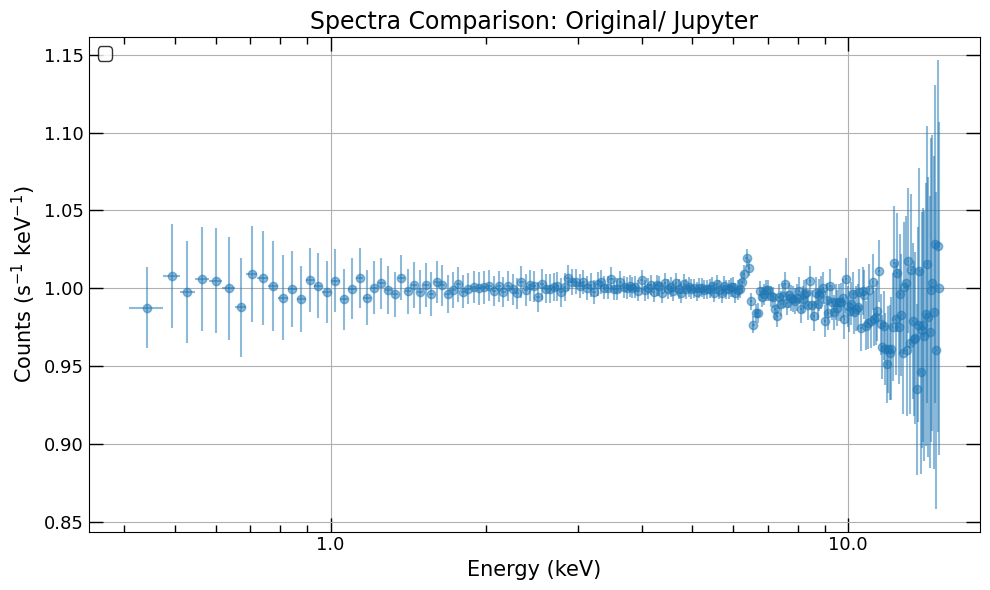

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract data for the first spectrum jupyter
x1 = Plot.x(1)          # X-axis values for first spectrum
y1 = Plot.y(1)          # Y-axis values for first spectrum
xerr1 = Plot.xErr(1)
yerr1 = Plot.yErr(1)    # Y-axis error values for first spectrum

# Extract data for the third spectrum terminal
x2 = Plot.x(2)          # X-axis values for second spectrum
y2 = Plot.y(2)          # Y-axis values for second spectrum
xerr2 = Plot.xErr(2)
yerr2 = Plot.yErr(2)    # Y-axis error values for second spectrum

counts_residual=[]
residual_err = []
for i in range(len(y2)): 
    counts_residual.append(y2[i] / y1[i])
    residual_err.append(counts_residual[i]*((yerr1[i]/y1[i])**2 + (yerr2[i]/y2[i])**2)**0.5 )
    
#print(counts_residual)
#mean_deviation = np.mean(np.abs(counts_residual))

# Print the result
#print(f"Mean Deviation: {mean_deviation:.4f}")

# wieghted mean to account for varying uncertainties in the data
#weighted_mean_deviation = np.sum(np.abs(counts_residual) / np.array(residual_err)) / np.sum(1 / np.array(residual_err))

# Print the weighted mean deviation
#print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot both spectra with error bars
ax.errorbar(x1, counts_residual, xerr=xerr1, yerr=residual_err, marker='o', linestyle='none', alpha=0.5)
#ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, marker='s', linestyle='none', label='Spectrum 2: C. Diez (priv. comm.)', alpha=0.5)

#plt.xlim(0.4, 10.5)
#plt.ylim(0.4, 10.5)


# Customize the plot appearance
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison: Original/ Jupyter", fontsize=17)
ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
#ax.axhline(0, color='red', linewidth=2, linestyle='-', label='y=0 Line')

# Display the plot
plt.tight_layout()
plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_division_jupyter_4Dec.png", dpi=300)
plt.show()

In [2]:
AllModels.clear()  # Clear all models
AllData.clear()    # Clear all data

In [6]:
# Load the group spectral file

# The group file already contains in the header the names of all the necessary files needed by xspec
# (source and background spectra, response and ancillery files)

data1 = Spectrum('/home/egulbaha/my_workspace/Vela-work/XMM-SAS-Datalabs-Paper/VelaX1data07Jan/PN_spectrum_grp_32-36_40-44.fits')  # load spectra groupped file
data2= Spectrum('/home/egulbaha/my_workspace/xmm_sas_datalabs/data/camillespectra/nondefault/PN_spectrum_grp_32-36_40-44.fits')


AllData.show()                # inspect loaded data

Creating a $HOME/.xspec directory for you

1 spectrum  in use
 
Spectral Data File: /home/egulbaha/my_workspace/Vela-work/XMM-SAS-Datalabs-Paper/VelaX1data07Jan/PN_spectrum_grp_32-36_40-44.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.907e+01 +/- 2.119e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-238
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.093e+05 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/egulbaha/my_workspace/Vela-work/XMM-SAS-Datalabs-Paper/VelaX1data07Jan/PN_32-36_40-44.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/egulbaha/my_workspace/Vela-work/XMM-SAS-Datalabs-Paper/VelaX1data07Jan/PN_32-36_40-44.arf


2 spectra  in use
 
Spectral Data File: /home/egulbaha/my_workspace/xmm_sas_datalabs/data/camillespectra/nondefault/PN_spectrum_grp_32-36_40-44.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  4.907e+01 +/- 2.119e-02
 Assigned to Data Group 1 and Plot Group 2
  N

In [7]:
# Set the plot device to /null to suppress graphical output

Plot.device = "/null"

#m = Model('powerlaw')

In [8]:
# First inspection of the spectrum

Plot.xAxis = "keV"        # set X axis to energy units
Plot.xLog  = True         # log scale
#Plot("ratio")   # plot source and background spectra

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Example: energy grids and spectra
E1 = np.array([...])  # Energy grid of spectrum 1
E2 = np.array([...])  # Energy grid of spectrum 2
spectrum_2 = np.array([...])  # Spectrum 2 values corresponding to E2

# Interpolate spectrum_2 onto the E1 grid
interpolate = interp1d(E2, spectrum_2, kind='linear', bounds_error=False, fill_value=0)
spectrum_2_interp = interpolate(E1)

In [26]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter

Plot("data")
# Get the data arrays
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)

energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)


counts1_interp = np.interp(energy2, energy1, counts1)

print(len(energy1))
print(len(energy2))
print(len(counts1))
print(len(counts2))

# Compute the ratio
deviation = (counts2 - counts1_interp) 

y_err_new1 = np.interp(energy2, energy1 , errors1)

residual_err = (y_err_new1**2 + errors2**2)**0.5


mean_deviation = np.mean(np.abs(deviation))

# Print the result
print(f"Mean Deviation: {mean_deviation:.4f}")

# wieghted mean to account for varying uncertainties in the data
weighted_mean_deviation = np.sum(np.abs(deviation) / np.array(residual_err)) / np.sum(1 / np.array(residual_err))

# Print the weighted mean deviation
print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot using matplotlib
import matplotlib.pyplot as plt

plt.plot(energy2, deviation, yerr=residual_err, marker=".", linestyle="")
plt.xlabel("Energy (keV)")
plt.ylabel("Ratio")
plt.xscale("log")
ax = plt.gca()
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts residual (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison: Original-Datalabs", fontsize=17)
ax.legend(loc='upper left', fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra
ax.grid()    # Display grid lines
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
ax.axhline(0, color='red', linewidth=2, linestyle='-', label='y=0 Line')
plt.show()

238
238
238
238
***Warning: Fit is not current.


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [9]:


data1.ignore("**-0.5")
data1.ignore("10.0-**")
data2.ignore("**-0.5")
data2.ignore("10.0-**")
Plot("data")

     2 channels (1-2) ignored in spectrum #     1

    63 channels (176-238) ignored in spectrum #     1

     2 channels (1-2) ignored in spectrum #     2

    63 channels (176-238) ignored in spectrum #     2



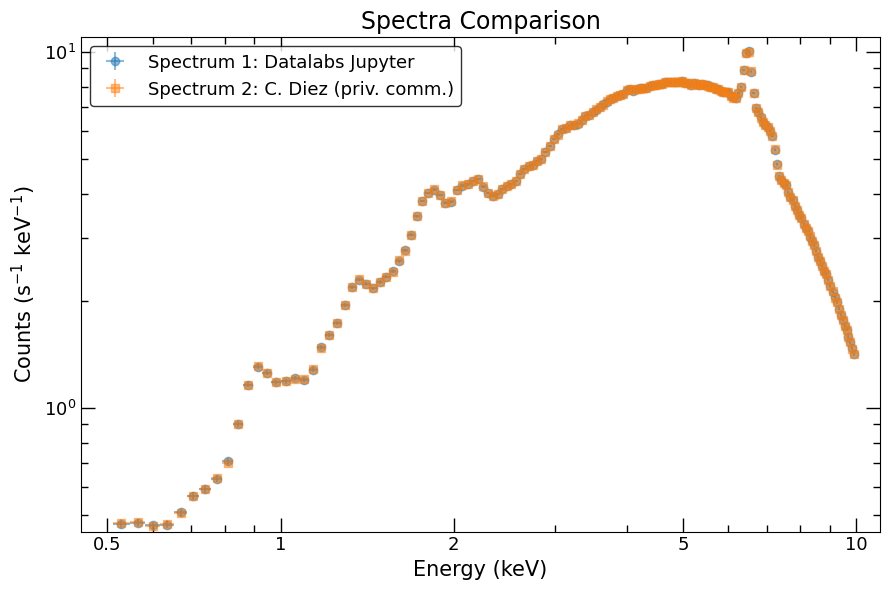

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))

# Extract data for the first spectrum
x1 = Plot.x(1)          # X-axis values for first spectrum
y1 = Plot.y(1)          # Y-axis values for first spectrum
xerr1 = Plot.xErr(1)
yerr1 = Plot.yErr(1)    # Y-axis error values for first spectrum

# Extract data for the second spectrum
x2 = Plot.x(2)          # X-axis values for second spectrum
y2 = Plot.y(2)          # Y-axis values for second spectrum
xerr2 = Plot.xErr(2)
yerr2 = Plot.yErr(2)    # Y-axis error values for second spectrum


# Plot both spectra with error bars
ax.errorbar(x1, y1, xerr=xerr1, yerr=yerr1, marker='o', linestyle='none', label='Spectrum 1: Datalabs Jupyter', alpha=0.5)
ax.errorbar(x2, y2, xerr=xerr2, yerr=yerr2, marker='s', linestyle='none', label='Spectrum 2: C. Diez (priv. comm.)', alpha=0.5)


plt.xlim(0.45, 11)
plt.ylim(0.45, 11)
#ax.set_xlim(6, 7)
#ax.set_ylim(6, 11)

# Customize the plot appearance
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel(r'Counts (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter())  # Format X-axis labels
ax.set_title("Spectra Comparison", fontsize=17)
ax.legend(fontsize=13, facecolor='white', edgecolor='black')  # Add a legend to distinguish the spectra

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax.tick_params(axis='both', which='minor', length=5, width=1)
plt.xticks([0.5, 1, 2, 5, 10], labels=[0.5, 1, 2, 5, 10])

# Display the plot
plt.tight_layout()
#plt.savefig("/home/egulbaha/my_workspace/xmm_sas_datalabs/data/images/spectra_comparison_big_04Dec.png", dpi=300)
plt.show()

Mean Deviation: 0.0062
Weighted Mean Deviation: 0.0056


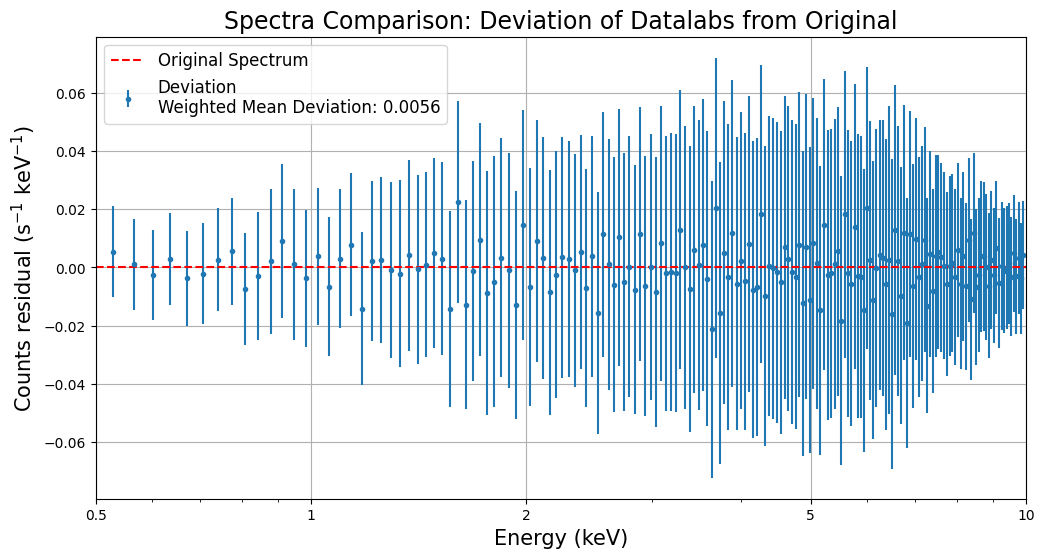

In [11]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Plot data in XSPEC


# Get the data arrays
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)

energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)

# Interpolate counts1 to the energy grid of energy2
counts1_interp = np.interp(energy2, energy1, counts1)

# Convert errors to NumPy arrays for element-wise operations
errors1 = np.array(errors1)
errors2 = np.array(errors2)

# Interpolate errors1 to the energy grid of energy2
y_err_new1 = np.interp(energy2, energy1, errors1)

# Compute the residual error
residual_err = np.sqrt(y_err_new1**2 + errors2**2)

# Compute the deviation
deviation = counts2 - counts1_interp

# Compute the mean deviation
mean_deviation = np.mean(np.abs(deviation))
print(f"Mean Deviation: {mean_deviation:.4f}")

# Weighted mean deviation
weighted_mean_deviation = np.sum(np.abs(deviation) / residual_err) / np.sum(1 / residual_err)
print(f"Weighted Mean Deviation: {weighted_mean_deviation:.4f}")

# Plot the deviation
plt.figure(figsize=(12, 6))
plt.errorbar(energy2, deviation, yerr=residual_err, fmt=".", label=f"Deviation\nWeighted Mean Deviation: {weighted_mean_deviation:.4f}")
plt.xlabel("Energy (keV)", fontsize=15)
plt.ylabel(r"Counts residual (s$^{-1}$ keV$^{-1}$)", fontsize=15)
plt.xscale("log")
plt.xlim(0.5, 10)
plt.axhline(0, color="red", linestyle="--", linewidth=1.5, label="Original Spectrum")
plt.legend(fontsize=12, loc='upper left')
plt.xticks([0.5, 1, 2, 5, 10], labels=[0.5, 1, 2, 5, 10])
plt.grid(True)
plt.title("Spectra Comparison: Deviation of Datalabs from Original", fontsize=17)
plt.savefig('datalabs-camille-spec-deviation.png')
plt.show()



Mean Ratio Residual: 0.0018


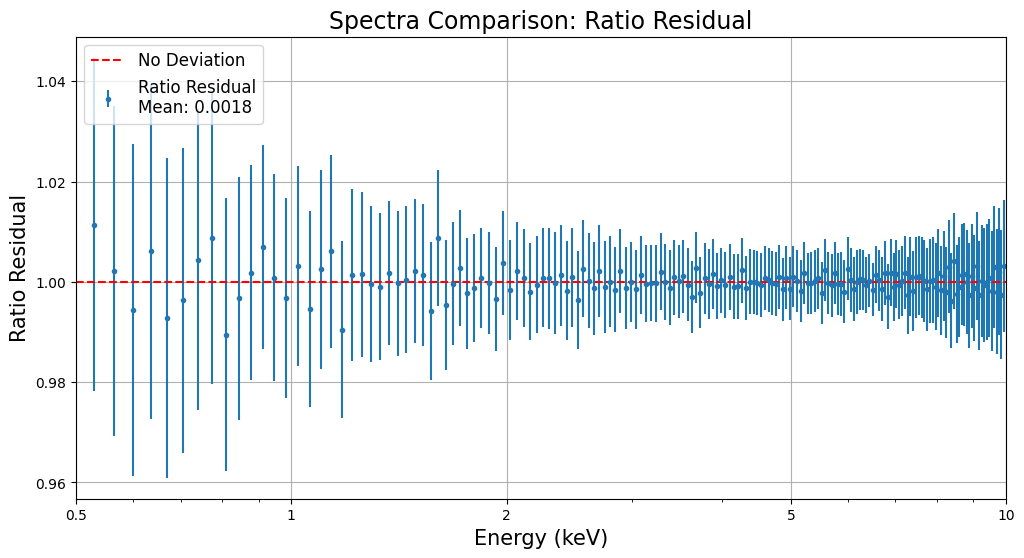

In [12]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Plot data in XSPEC

# Get the data arrays
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)

energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)

# Interpolate counts1 to the energy grid of energy2
counts1_interp = np.interp(energy2, energy1, counts1)

# Convert errors to NumPy arrays for element-wise operations
errors1 = np.array(errors1)
errors2 = np.array(errors2)

# Interpolate errors1 to the energy grid of energy2
y_err_new1 = np.interp(energy2, energy1, errors1)

# Compute the ratio residuals
ratio_residual = counts2 / counts1_interp

# Compute the propagated error for the ratio
ratio_error = ratio_residual * np.sqrt((errors2 / counts2) ** 2 + (y_err_new1 / counts1_interp) ** 2)

# Compute the mean ratio residual
mean_ratio_residual = np.mean(np.abs(ratio_residual - 1))
print(f"Mean Ratio Residual: {mean_ratio_residual:.4f}")

# Plot the ratio residual
plt.figure(figsize=(12, 6))
plt.errorbar(energy2, ratio_residual, yerr=ratio_error, fmt=".", label=f"Ratio Residual\nMean: {mean_ratio_residual:.4f}")
plt.xlabel("Energy (keV)", fontsize=15)
plt.ylabel("Ratio Residual", fontsize=15)
plt.xscale("log")
plt.xlim(0.5, 10)
plt.axhline(1, color="red", linestyle="--", linewidth=1.5, label="No Deviation")
plt.legend(fontsize=12, loc='upper left')
plt.xticks([0.5, 1, 2, 5, 10], labels=[0.5, 1, 2, 5, 10])
plt.grid(True)
plt.title("Spectra Comparison: Ratio Residual", fontsize=17)
#plt.savefig('datalabs-camille-spec-ratio-residual.png')
plt.show()


Mean Ratio Residual: 0.0018


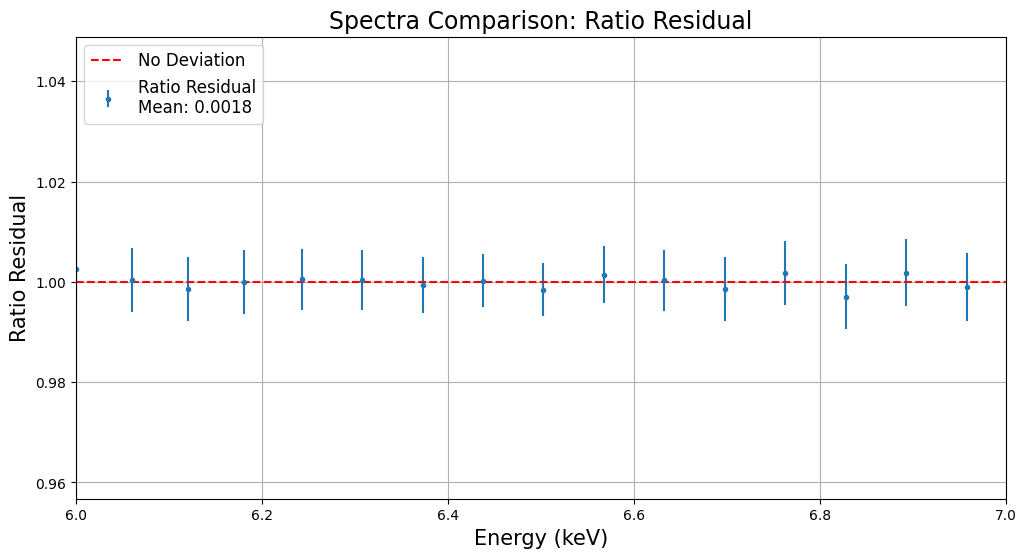

In [13]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Plot data in XSPEC

# Get the data arrays
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)

energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)

# Interpolate counts1 to the energy grid of energy2
counts1_interp = np.interp(energy2, energy1, counts1)

# Convert errors to NumPy arrays for element-wise operations
errors1 = np.array(errors1)
errors2 = np.array(errors2)

# Interpolate errors1 to the energy grid of energy2
y_err_new1 = np.interp(energy2, energy1, errors1)

# Compute the ratio residuals
ratio_residual = counts2 / counts1_interp

# Compute the propagated error for the ratio
ratio_error = ratio_residual * np.sqrt((errors2 / counts2) ** 2 + (y_err_new1 / counts1_interp) ** 2)

# Compute the mean ratio residual
mean_ratio_residual = np.mean(np.abs(ratio_residual - 1))
print(f"Mean Ratio Residual: {mean_ratio_residual:.4f}")

# Plot the ratio residual
plt.figure(figsize=(12, 6))
plt.errorbar(energy2, ratio_residual, yerr=ratio_error, fmt=".", label=f"Ratio Residual\nMean: {mean_ratio_residual:.4f}")
plt.xlabel("Energy (keV)", fontsize=15)
plt.ylabel("Ratio Residual", fontsize=15)

plt.xlim(6, 7)
plt.axhline(1, color="red", linestyle="--", linewidth=1.5, label="No Deviation")
plt.legend(fontsize=12, loc='upper left')
plt.xticks([6, 6.2, 6.4, 6.6, 6.8, 7], labels=[6.0, 6.2, 6.4, 6.6, 6.8, 7.0])
plt.grid(True)
plt.title("Spectra Comparison: Ratio Residual", fontsize=17)
#plt.savefig('datalabs-camille-spec-ratio-residual.png')
plt.show()


Mean Ratio Residual: 0.0018


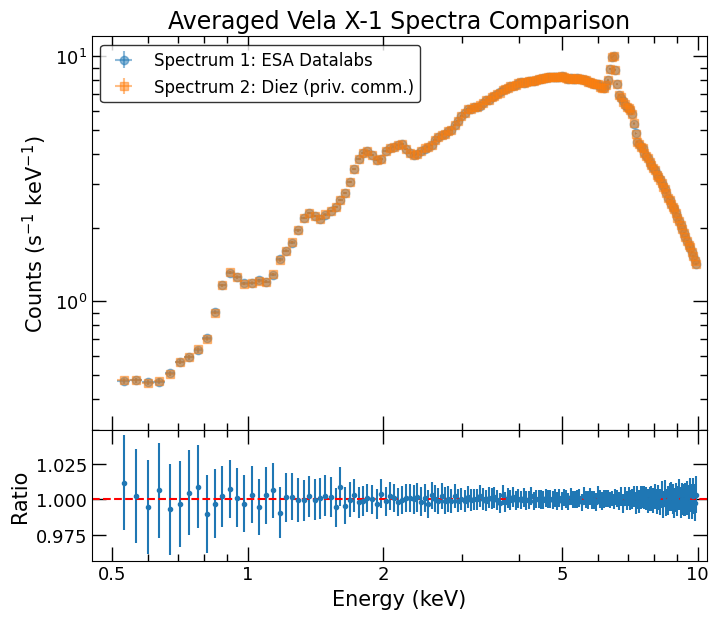

In [19]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Extract data for the first spectrum
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)
xerr1 = Plot.xErr(1)

# Extract data for the second spectrum
energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)
xerr2 = Plot.xErr(2)

# Interpolate counts1 to the energy grid of energy2
counts1_interp = np.interp(energy2, energy1, counts1)

# Convert errors to NumPy arrays for element-wise operations
errors1 = np.array(errors1)
errors2 = np.array(errors2)

# Interpolate errors1 to the energy grid of energy2
y_err_new1 = np.interp(energy2, energy1, errors1)

# Compute the ratio residuals
ratio_residual = counts2 / counts1_interp

# Compute the propagated error for the ratio
ratio_error = ratio_residual * np.sqrt((errors2 / counts2) ** 2 + (y_err_new1 / counts1_interp) ** 2)

# Compute the mean ratio residual
mean_ratio_residual = np.mean(np.abs(ratio_residual - 1))
print(f"Mean Ratio Residual: {mean_ratio_residual:.4f}")

# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})  # hspace=0 removes the gap

# Plot spectra comparison (upper plot)
ax1.errorbar(energy1, counts1, xerr=xerr1, yerr=errors1, fmt='o', label='Spectrum 1: ESA Datalabs', alpha=0.5)
ax1.errorbar(energy2, counts2, xerr=xerr2, yerr=errors2, fmt='s', label='Spectrum 2: Diez (priv. comm.)', alpha=0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'Counts (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax1.set_xlim(0.45, 10.5)

ax1.set_ylim(0.3, max(np.max(counts1), np.max(counts2)) * 1.2)
ax1.set_title("Averaged Vela X-1 Spectra Comparison", fontsize=17)
ax1.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax1.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax1.tick_params(axis='both', which='minor', length=5, width=1)
plt.xticks([0.5, 1, 2, 5, 10])

ax1.legend(fontsize=12, facecolor='white', edgecolor='black')

# Plot ratio residuals (lower plot)
ax2.errorbar(energy2, ratio_residual, yerr=ratio_error, fmt=".", label=f"Ratio Residual\n With Mean: {mean_ratio_residual:.4f}")
ax2.axhline(1, color="red", linestyle="--", linewidth=1.5, label="No Deviation")
ax2.set_xscale('log')
ax2.set_xlabel("Energy (keV)", fontsize=15)
ax2.set_ylabel("Ratio", fontsize=15)
ax2.set_xlim(0.45, 10.5)
#ax2.legend(fontsize=12, facecolor='white', edgecolor='black', loc='upper right')

# Format shared x-axis
plt.xticks([0.5, 1, 2, 5, 10], labels=[0.5, 1, 2, 5, 10])
ax2.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax2.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax2.tick_params(axis='both', which='minor', length=5, width=1)

# Tight layout and display
plt.tight_layout(pad=0)  # pad=0 minimizes gaps between figure edges
plt.savefig('spectra_and_ratio_residuals_combined_nogap.png', dpi=300)
plt.show()


Mean Ratio Residual: 0.0018


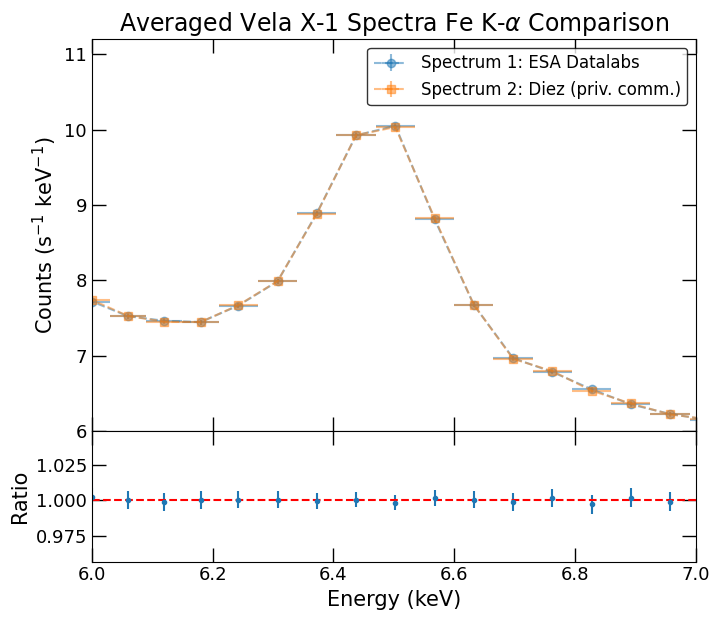

In [21]:
import numpy as np
from xspec import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Extract data for the first spectrum
energy1 = Plot.x(1)
counts1 = Plot.y(1)
errors1 = Plot.yErr(1)
xerr1 = Plot.xErr(1)

# Extract data for the second spectrum
energy2 = Plot.x(2)
counts2 = Plot.y(2)
errors2 = Plot.yErr(2)
xerr2 = Plot.xErr(2)

# Interpolate counts1 to the energy grid of energy2
counts1_interp = np.interp(energy2, energy1, counts1)

# Convert errors to NumPy arrays for element-wise operations
errors1 = np.array(errors1)
errors2 = np.array(errors2)

# Interpolate errors1 to the energy grid of energy2
y_err_new1 = np.interp(energy2, energy1, errors1)

# Compute the ratio residuals
ratio_residual = counts2 / counts1_interp

# Compute the propagated error for the ratio
ratio_error = ratio_residual * np.sqrt((errors2 / counts2) ** 2 + (y_err_new1 / counts1_interp) ** 2)

# Compute the mean ratio residual
mean_ratio_residual = np.mean(np.abs(ratio_residual - 1))
print(f"Mean Ratio Residual: {mean_ratio_residual:.4f}")

# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})  # hspace=0 removes the gap

# Plot spectra comparison (upper plot)
ax1.errorbar(energy1, counts1, xerr=xerr1, yerr=errors1, fmt='o', linestyle="--", label='Spectrum 1: ESA Datalabs', alpha=0.5)
ax1.errorbar(energy2, counts2, xerr=xerr2, yerr=errors2, fmt='s', linestyle="--", label='Spectrum 2: Diez (priv. comm.)', alpha=0.5)

ax1.set_ylabel(r'Counts (s$^{-1}$ keV$^{-1}$)', fontsize=15)
ax1.set_xlim(6, 7)

ax1.set_ylim(6, 11.2)
ax1.set_title(r"Averaged Vela X-1 Spectra Fe K-$\alpha$ Comparison", fontsize=17)
ax1.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax1.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax1.tick_params(axis='both', which='minor', length=5, width=1)

ax1.legend(fontsize=12, facecolor='white', edgecolor='black')

# Plot ratio residuals (lower plot)
ax2.errorbar(energy2, ratio_residual, yerr=ratio_error, fmt=".", label=f"Ratio Residual")
ax2.axhline(1, color="red", linestyle="--", linewidth=1.5, label="No Deviation")
ax2.set_xlabel("Energy (keV)", fontsize=15)
ax2.set_ylabel("Ratio", fontsize=15)
ax2.set_xlim(6, 7)
#ax2.legend(fontsize=12, facecolor='white', edgecolor='black', loc='upper right')

# Format shared x-axis
plt.xticks([6, 6.2, 6.4, 6.6, 6.8, 7], labels=[6.0, 6.2, 6.4, 6.6, 6.8, 7.0])
ax2.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax2.tick_params(axis='both', which='major', labelsize=13, length=10, width=1)  
ax2.tick_params(axis='both', which='minor', length=5, width=1)

# Tight layout and display
plt.tight_layout(pad=0)  # pad=0 minimizes gaps between figure edges
plt.savefig('Fe_spectra_and_ratio_residuals_combined_nogap.png', dpi=300)
plt.show()
